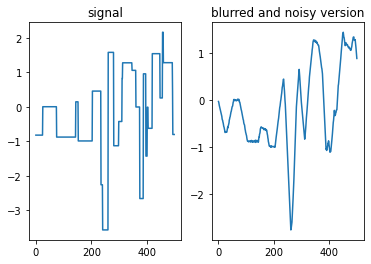

In [128]:
import numpy as np
import matplotlib.pyplot as plt

## deblurring

n = 500
k = 30
sigma = 0.01

# generate random piecewise constant signal
w = np.zeros((n, 1))
w[0] = np.random.standard_normal()
for i in range(1, n):
    if np.random.rand(1) < 0.95:
        w[i] = w[i-1]
    else:
        w[i] = np.random.standard_normal()


# generate k-point averaging function
h = np.ones(k) / k

# make a matrix for blurring
m = n + k - 1
X = np.zeros((m, m))
for i in range(m):
    if i < k:
        X[i, :i+1] = h[:i+1]
    else:
        X[i, i - k: i] = h

X = X[:, 0:n]

# blurred signal + noise
y = np.dot(X, w) + sigma*np.random.standard_normal(size=(m, 1))

# plot
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('signal')
ax1.plot(w)
ax2.set_title('blurred and noisy version')
ax2.plot(y[0:n])

plt.show()

In [4]:
from numpy import linalg as la

In [131]:
w_ls=la.inv(X.T@X)@X.T@y
w_ls

array([[-7.85861966e-01],
       [-5.67086056e-01],
       [-1.17890402e+00],
       [-9.29243950e-01],
       [-8.13119230e-01],
       [-6.99720195e-01],
       [-4.98385874e-01],
       [-1.04326674e+00],
       [-8.28313219e-01],
       [-8.24611369e-01],
       [-8.85213440e-01],
       [-4.18180686e-01],
       [-9.11562570e-01],
       [-1.36735192e+00],
       [-8.34738123e-01],
       [-3.01110906e-01],
       [-1.13077283e+00],
       [-5.06341253e-01],
       [-1.17100481e+00],
       [-1.18319907e+00],
       [-1.86483873e-01],
       [-1.18300938e+00],
       [-8.91779379e-01],
       [-6.23069535e-01],
       [-9.43379332e-01],
       [ 3.46302110e-01],
       [ 2.11978091e-01],
       [-4.53646492e-01],
       [ 2.19484470e-01],
       [ 3.78584356e-02],
       [-2.93556104e-02],
       [ 6.21126597e-01],
       [-1.27348446e-01],
       [-1.27624838e+00],
       [ 2.72801240e-01],
       [-2.79908032e-02],
       [ 4.66024928e-01],
       [-4.31262777e-01],
       [ 9.1

In [132]:
U,S,V=la.svd(X)
V=V.T
S_full=np.zeros(X.shape)
S_full[:X.shape[1],:X.shape[0]]=np.diag(1/S)
S_full_inv=S_full.T
w_svd=V@S_full_inv@U.T@y
w_svd

array([[-7.85861966e-01],
       [-5.67086056e-01],
       [-1.17890402e+00],
       [-9.29243950e-01],
       [-8.13119230e-01],
       [-6.99720195e-01],
       [-4.98385874e-01],
       [-1.04326674e+00],
       [-8.28313219e-01],
       [-8.24611369e-01],
       [-8.85213440e-01],
       [-4.18180686e-01],
       [-9.11562570e-01],
       [-1.36735192e+00],
       [-8.34738123e-01],
       [-3.01110906e-01],
       [-1.13077283e+00],
       [-5.06341253e-01],
       [-1.17100481e+00],
       [-1.18319907e+00],
       [-1.86483873e-01],
       [-1.18300938e+00],
       [-8.91779379e-01],
       [-6.23069535e-01],
       [-9.43379332e-01],
       [ 3.46302110e-01],
       [ 2.11978091e-01],
       [-4.53646492e-01],
       [ 2.19484470e-01],
       [ 3.78584356e-02],
       [-2.93556104e-02],
       [ 6.21126597e-01],
       [-1.27348446e-01],
       [-1.27624838e+00],
       [ 2.72801240e-01],
       [-2.79908032e-02],
       [ 4.66024928e-01],
       [-4.31262777e-01],
       [ 9.1

In [133]:
lambda_bin=[1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5]
error_bin=np.zeros((len(lambda_bin),23))
for i, lambda_ in enumerate(lambda_bin):
    idx=np.arange(529)
    for j in range(23):
        train_idx=idx[((idx<23*j) | (idx>=23*(j+1)))]
        val_idx=idx[(idx>=23*j) & (idx<23*(j+1))]
        X_train=X[train_idx,:]
        X_val=X[val_idx,:]
        y_train=y[train_idx,:]
        y_val=y[val_idx,:]
        w=la.inv(X_train.T@X_train+lambda_*np.identity(len(X_train[0])))@X_train.T@y_train
        error_bin[i,j]=la.norm(y_val-X_val@w)/len(X_val)
    print("error lambda "+str(lambda_bin[i])+"=" +str(np.average(error_bin,axis=1)[i]))
best_lambda=lambda_bin[np.argmin(np.average(error_bin,axis=1))]
print("best lambda= ",best_lambda)
w_rls=la.inv(X_train.T@X_train+best_lambda*np.identity(len(X_train[0])))@X_train.T@y_train
w_rls

error lambda 1e-05=0.006892874956273454
error lambda 0.0001=0.005720586915544645
error lambda 0.001=0.011723738310949243
error lambda 0.01=0.027639733659978627
error lambda 0.1=0.07410206878290154
error lambda 1=0.12695138363210648
error lambda 10.0=0.1526442647691806
error lambda 100.0=0.1568227319928574
error lambda 1000.0=0.15726890035066096
error lambda 10000.0=0.15731382207638603
error lambda 100000.0=0.15731831732119056
best lambda=  0.0001


array([[-7.66272356e-01],
       [-7.23805438e-01],
       [-1.13705224e+00],
       [-7.05100806e-01],
       [-8.85568788e-01],
       [-6.98068231e-01],
       [-6.51155051e-01],
       [-8.41994210e-01],
       [-1.06503014e+00],
       [-7.96390677e-01],
       [-8.55666571e-01],
       [-3.96499230e-01],
       [-9.43061253e-01],
       [-1.26167653e+00],
       [-8.50120657e-01],
       [-3.21839379e-01],
       [-1.15616514e+00],
       [-6.45922874e-01],
       [-1.05659768e+00],
       [-8.82445646e-01],
       [-3.93158004e-01],
       [-1.09575183e+00],
       [-8.73624479e-01],
       [-6.32089261e-01],
       [-9.78179385e-01],
       [ 3.31758169e-01],
       [ 8.51537741e-02],
       [-3.41531009e-01],
       [ 1.26497246e-01],
       [ 2.69654902e-02],
       [ 4.66606758e-02],
       [ 3.48702069e-01],
       [-1.19712730e-01],
       [-7.72844341e-01],
       [ 9.47849566e-02],
       [-1.20340115e-02],
       [ 1.81884284e-01],
       [-2.58200091e-02],
       [ 3.9

In [124]:
from numpy import linalg as la
for k in [7,30,53,76,99,122]:
    print('k='+str(k))
    n=500
    sigma = 0.01

    # generate random piecewise constant signal
    w = np.zeros((n, 1))
    w[0] = np.random.standard_normal()
    for i in range(1, n):
        if np.random.rand(1) < 0.95:
            w[i] = w[i-1]
        else:
            w[i] = np.random.standard_normal()


    # generate k-point averaging function
    h = np.ones(k) / k

    # make a matrix for blurring
    m = n + k - 1
    X = np.zeros((m, m))
    for i in range(m):
        if i < k:
            X[i, :i+1] = h[:i+1]
        else:
            X[i, i - k: i] = h

    X = X[:, 0:n]

    # blurred signal + noise
    y = np.dot(X, w) + sigma*np.random.standard_normal(size=(m, 1))
    
    lambda_bin=[1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5]
    error_bin=np.zeros((len(lambda_bin),23+(k-30)//23))
    for i, lambda_ in enumerate(lambda_bin):
        idx=np.arange(529+(k-30))
        for j in range(23+(k-30)//23):
            train_idx=idx[((idx<23*j) | (idx>=23*(j+1)))]
            val_idx=idx[(idx>=23*j) & (idx<23*(j+1))]
            X_train=X[train_idx,:]
            X_val=X[val_idx,:]
            y_train=y[train_idx,:]
            y_val=y[val_idx,:]
            w=la.inv(X_train.T@X_train+lambda_*np.identity(len(X_train[0])))@X_train.T@y_train
            error_bin[i,j]=la.norm(y_val-X_val@w)/len(X_val)
        print("error lambda "+str(lambda_bin[i])+"=" +str(np.average(error_bin,axis=1)[i]))
    print("best lambda= ",lambda_bin[np.argmin(np.average(error_bin,axis=1))])

k=7
error lambda 1e-05=0.10763973994042889
error lambda 0.0001=0.1074760715910704
error lambda 0.001=0.10778816447443705
error lambda 0.01=0.10954071516131564
error lambda 0.1=0.11507906459799132
error lambda 1=0.12562511749172972
error lambda 10.0=0.1320846142842026
error lambda 100.0=0.13318883323961692
error lambda 1000.0=0.13330762656555672
error lambda 10000.0=0.13331959671063784
error lambda 100000.0=0.1333207946409972
best lambda=  0.0001
k=30
error lambda 1e-05=0.006964938515405457
error lambda 0.0001=0.005453352010699954
error lambda 0.001=0.010185490983284617
error lambda 0.01=0.021060405021858065
error lambda 0.1=0.05834292198663391
error lambda 1=0.11491153316148904
error lambda 10.0=0.14263033229984065
error lambda 100.0=0.14704520301703372
error lambda 1000.0=0.1475149277520055
error lambda 10000.0=0.14756220330061082
error lambda 100000.0=0.14756693390848066
best lambda=  0.0001
k=53
error lambda 1e-05=0.005901639527123653
error lambda 0.0001=0.004254446357063912
error l

In [125]:
from numpy import linalg as la
for sigma in [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5]:
    print('sigma='+str(sigma))
    n=500
    k=30

    # generate random piecewise constant signal
    w = np.zeros((n, 1))
    w[0] = np.random.standard_normal()
    for i in range(1, n):
        if np.random.rand(1) < 0.95:
            w[i] = w[i-1]
        else:
            w[i] = np.random.standard_normal()


    # generate k-point averaging function
    h = np.ones(k) / k

    # make a matrix for blurring
    m = n + k - 1
    X = np.zeros((m, m))
    for i in range(m):
        if i < k:
            X[i, :i+1] = h[:i+1]
        else:
            X[i, i - k: i] = h

    X = X[:, 0:n]

    # blurred signal + noise
    y = np.dot(X, w) + sigma*np.random.standard_normal(size=(m, 1))
    lambda_bin=[1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5]
    error_bin=np.zeros((len(lambda_bin),23))
    for i, lambda_ in enumerate(lambda_bin):
        idx=np.arange(529)
        for j in range(23):
            train_idx=idx[((idx<23*j) | (idx>=23*(j+1)))]
            val_idx=idx[(idx>=23*j) & (idx<23*(j+1))]
            X_train=X[train_idx,:]
            X_val=X[val_idx,:]
            y_train=y[train_idx,:]
            y_val=y[val_idx,:]
            w=la.inv(X_train.T@X_train+lambda_*np.identity(len(X_train[0])))@X_train.T@y_train
            error_bin[i,j]=la.norm(y_val-X_val@w)/len(X_val)
        print("error lambda "+str(lambda_bin[i])+"=" +str(np.average(error_bin,axis=1)[i]))
    print("best lambda= ",lambda_bin[np.argmin(np.average(error_bin,axis=1))])

sigma=1e-05
error lambda 1e-05=0.0005711208592625369
error lambda 0.0001=0.002602083925381733
error lambda 0.001=0.009096340587597215
error lambda 0.01=0.022871588596848434
error lambda 0.1=0.05019600856968823
error lambda 1=0.0925022261803076
error lambda 10.0=0.11364909532162529
error lambda 100.0=0.11689097033326569
error lambda 1000.0=0.11723384339253375
error lambda 10000.0=0.1172683305375586
error lambda 100000.0=0.11727178126444522
best lambda=  1e-05
sigma=0.0001
error lambda 1e-05=0.00041115255641689197
error lambda 0.0001=0.0018494086197300863
error lambda 0.001=0.006499255022535419
error lambda 0.01=0.015863171928621404
error lambda 0.1=0.04057413602598412
error lambda 1=0.0755470323605191
error lambda 10.0=0.08977338401765485
error lambda 100.0=0.09188353295426029
error lambda 1000.0=0.09210603318567179
error lambda 10000.0=0.09212840615849865
error lambda 100000.0=0.09213064469400088
best lambda=  1e-05
sigma=0.001
error lambda 1e-05=0.0007490359121287373
error lambda 0.00